In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
%matplotlib inline

### Update equations

$$\dot{S} = -\beta S Z $$ 
$$\dot{Z} = (\beta - \kappa) S Z $$
$$\dot{R} = \kappa S Z $$


$$\alpha = \kappa / \beta$$

## Hexagonal lattice model

### Function definitions

In [3]:
def square_lattice_to_hex(lattice):
    def roll_even(i, arr):
        if i%2 == 0:
            return np.roll(arr, 1)
        else:
            return arr
    
    lattice_rep_cols = np.repeat(lattice, 2, axis=1)
    
    rolled = np.array([roll_even(i, arr) for i, arr in enumerate(lattice_rep_cols)])
    hex_lattice = np.repeat(rolled, 2, axis=0)
    return hex_lattice

In [4]:
# TODO Fix the problem with the asserts for the hexagonal lattice

def simulate_lattice(L, k, b):
    print(f"Simulating with L={L}, k={k}, b={b}")
    def update(lattice, queue, k, b):
        if len(queue) == 0:
            return lattice, queue

        ind = np.random.randint(len(queue))
        r = np.random.uniform()

        if r < b/(b + k):
            xyz, xys = queue.pop(ind)
            #print("if - xyz and xys:", lattice[xyz], lattice[xys])
            #assert(lattice[xyz] == 1)
            #assert(lattice[xys] == 0)
            lattice[xys] = 1

            for xyn in left(xys), right(xys), up(xys), down(xys), diag_top(xys), diag_down(xys):
                if lattice[xyn] == 0:
                    queue.append((xys, xyn))

            if len(queue) == 0:
                return lattice, queue

            for xyn in left(xys), right(xys), up(xys), down(xys), diag_top(xys), diag_down(xys):
                if lattice[xyn] == 1 and xyn != xyz and (xyn, xys) in queue:
                    #print("index", (xyn, xys))
                    ind = queue.index((xyn, xys))
                    queue.pop(ind)


        else:
            xyz, xys = queue.pop(ind)
            #print("else - xyz and xys:", lattice[xyz], lattice[xys])
            #assert(lattice[xyz] == 1)
            #assert(lattice[xys] == 0)
            lattice[xyz] = 2

            if len(queue) == 0:
                return lattice, queue

            for xyn in left(xyz), right(xyz), up(xyz), down(xyz), diag_top(xyz), diag_down(xyz):
                if lattice[xyn] == 0 and xyn != xys and (xyz, xyn) in queue:
                    ind = queue.index((xyz, xyn))
                    queue.pop(ind)

        return lattice, queue
    
    
    lattice = np.zeros((L, L), dtype = int)
    xy0 = (int(L/2), int(L/2))

    lattice[xy0] = 1

    left      = lambda xy: ((xy[0]-1)%L, xy[1]      )
    right     = lambda xy: ((xy[0]+1)%L, xy[1]      )
    up        = lambda xy: (      xy[0], (xy[1]+1)%L)
    down      = lambda xy: (      xy[0], (xy[1]-1)%L)
    diag_top  = lambda xy: ((xy[0]-1)%L, (xy[1]+1)%L)
    diag_down = lambda xy: ((xy[0]-1)%L, (xy[1]-1)%L)

    queue = [(xy0,  left(xy0)), 
             (xy0, right(xy0)), 
             (xy0,    up(xy0)), 
             (xy0,  down(xy0)),
             (xy0, diag_top(xy0)),
             (xy0, diag_down(xy0))]

    seed = np.random.randint(1000000)
    np.random.seed(seed)

    SZR = {0:[], 1:[], 2:[]}

    start_time = time.time()
    while len(queue) != 0:

        labels, counts = np.unique(lattice, return_counts = True)

        for j in range(len(labels)):
            SZR[labels[j]].append(counts[j])

        lattice, queue = update(lattice, queue, k, b)

    print(f"Runtime: {time.time() - start_time} sec.") 
    return lattice, SZR

In [5]:
def simulate_and_plot(L, k, b=1):
    lattice, SZR = simulate_lattice(L, k, b)
    plt.figure(1)
    plt.imshow(square_lattice_to_hex(lattice))
    plt.figure(2)
    plt.plot(SZR[0])
    plt.plot(SZR[1])
    plt.plot(SZR[2])

### Simulations

Simulating with L=64, k=0.4, b=1
Runtime: 1.0352845191955566 sec.


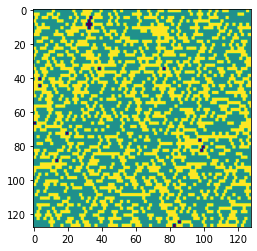

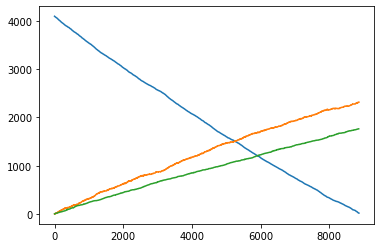

In [6]:
simulate_and_plot(L=64, k=0.4, b=1)

Simulating with L=64, k=0.2, b=1
Runtime: 1.3583157062530518 sec.


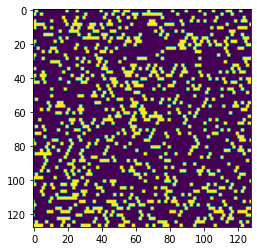

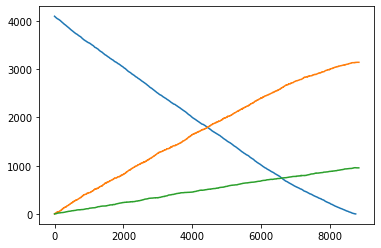

In [7]:
simulate_and_plot(L=64, k=0.2, b=1)

Simulating with L=64, k=0.6, b=1
Runtime: 0.7397706508636475 sec.


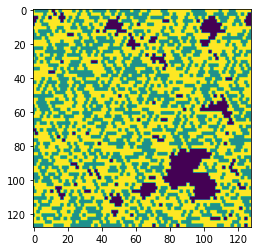

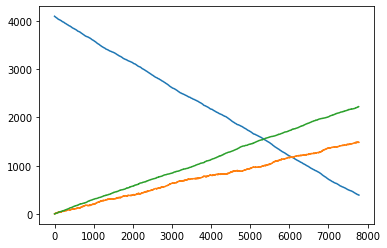

In [8]:
simulate_and_plot(L=64, k=0.6, b=1)

Simulating with L=128, k=0.63, b=1
Runtime: 6.64457893371582 sec.


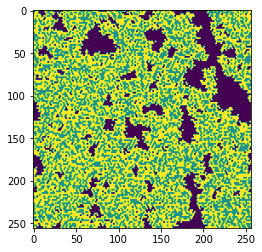

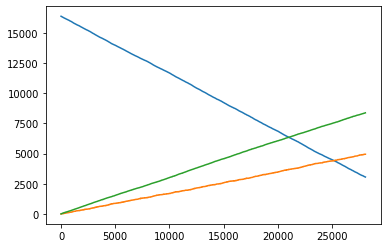

In [9]:
simulate_and_plot(L=128, k=0.63, b=1)